In [1]:
import pandas as pd
import numpy as np

In [33]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
filename = "titanic-1.xls"
df = pd.read_excel(filename)

df.head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [36]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [37]:
modeldf = df[['sex', 'age', 'survived', 'pclass', 'fare']]
modeldf.head()

,sex,age,survived,pclass,fare
0,female,29.0000,1,1,211.3375
1,male,0.9167,1,1,151.5500
2,female,2.0000,0,1,151.5500
3,male,30.0000,0,1,151.5500
4,female,25.0000,0,1,151.5500


In [38]:
modeldf.corr()

,age,survived,pclass,fare
age,1.000000,-0.055513,-0.408106,0.178739
survived,-0.055513,1.000000,-0.312469,0.244265
pclass,-0.408106,-0.312469,1.000000,-0.558629
fare,0.178739,0.244265,-0.558629,1.000000


In [39]:
modeldf["fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64

In [67]:
modeldf.shape

(1045, 4)

In [68]:
modeldf.head()

,sex,age,survived,fare
0,female,29.0000,1,211.3375
1,male,0.9167,1,151.5500
2,female,2.0000,0,151.5500
3,male,30.0000,0,151.5500
4,female,25.0000,0,151.5500


In [74]:
modeldf['sex'] = modeldf['sex'].map({'female': 0, 'male': 1})
modeldf.head()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_1192/1071397659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldf['sex'] = modeldf['sex'].map({'female': 0, 'male': 1})


,sex,age,survived,fare
0,0,29.0000,1,211.3375
1,1,0.9167,1,151.5500
2,0,2.0000,0,151.5500
3,1,30.0000,0,151.5500
4,0,25.0000,0,151.5500


In [75]:
X = modeldf.drop('survived', axis=1)

#column of predictive target values
y = modeldf['survived']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)

In [77]:
from sklearn.naive_bayes import BernoulliNB

In [78]:
bnb = BernoulliNB()

In [79]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [80]:
bnb.score(X_train, y_train)

0.7854406130268199

In [84]:
y_pred = bnb.predict(X_test)

In [85]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Failed', 'Predicted Passed'],
    index=['True Failed', 'True Passed']
)

cm

,Predicted Failed,Predicted Passed
True Failed,127,32
True Passed,31,72


In [86]:
bnb.score(X_test, y_test)

0.7595419847328244

In [87]:
gnb = GaussianNB()

In [88]:
gnb.fit(X_train, y_train)

GaussianNB()

In [89]:
gnb.score(X_train, y_train)

0.7752234993614304

In [90]:
y_pred = gnb.predict(X_test)

In [91]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Failed', 'Predicted Passed'],
    index=['True Failed', 'True Passed']
)

cm

,Predicted Failed,Predicted Passed
True Failed,124,35
True Passed,28,75


In [92]:
y_test.value_counts()

0    159
1    103
Name: survived, dtype: int64

In [93]:
gnb.score(X_test, y_test)

0.7595419847328244

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       159
           1       0.68      0.73      0.70       103

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



In [95]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare', ylabel='count'>

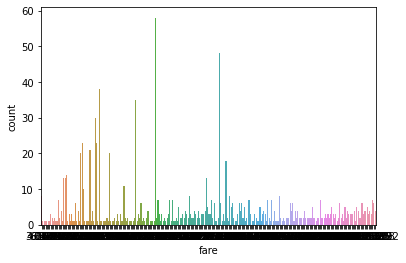

In [96]:
sns.countplot(modeldf['fare'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

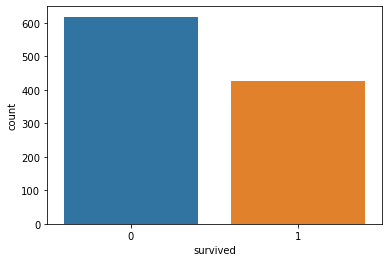

In [97]:
sns.countplot(modeldf['survived'])

In [98]:
kmeans = KMeans(n_clusters=5)

In [99]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [100]:
kmeans.cluster_centers_

array([[5.31645570e-01, 3.67056962e+01, 6.57190690e+01],
       [3.12500000e-01, 3.70468750e+01, 2.38608594e+02],
       [3.95348837e-01, 3.38817837e+01, 1.33555521e+02],
       [5.00000000e-01, 4.10000000e+01, 5.12329200e+02],
       [6.73267327e-01, 2.79569926e+01, 1.55020567e+01]])

In [102]:
modeldf['cluster'] = kmeans.labels_
modeldf.head()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_1192/2973157616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldf['cluster'] = kmeans.labels_


,sex,age,survived,fare,cluster
0,0,29.0000,1,211.3375,1
1,1,0.9167,1,151.5500,2
2,0,2.0000,0,151.5500,2
3,1,30.0000,0,151.5500,2
4,0,25.0000,0,151.5500,2


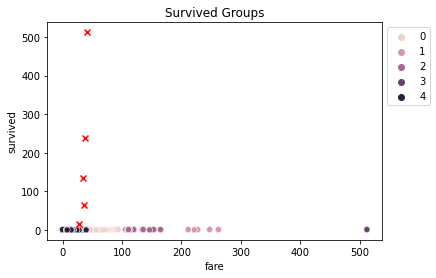

In [110]:

sns.scatterplot(data=modeldf, x='fare', y='survived', hue='cluster')


plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Survived Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

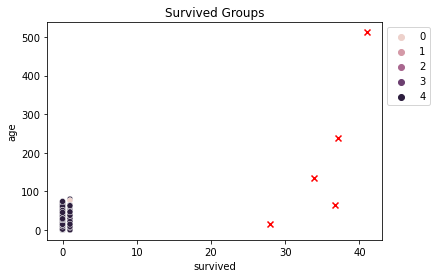

In [111]:

sns.scatterplot(data=modeldf, x='survived', y='age', hue='cluster')


plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Survived Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

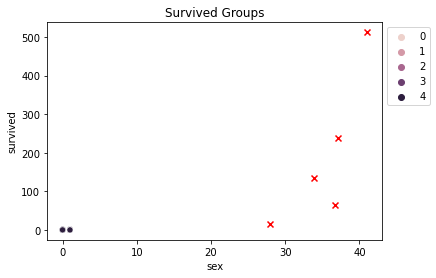

In [112]:

sns.scatterplot(data=modeldf, x='sex', y='survived', hue='cluster')


plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Survived Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

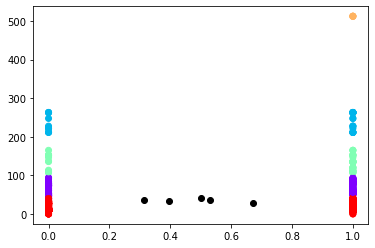

In [113]:
plt.scatter(modeldf['survived'],modeldf['fare'], c=modeldf['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

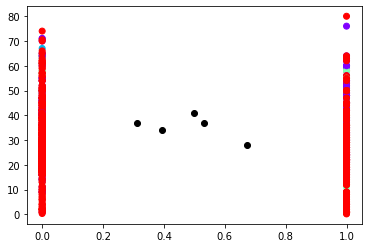

In [114]:
plt.scatter(modeldf['survived'],modeldf['age'], c=modeldf['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

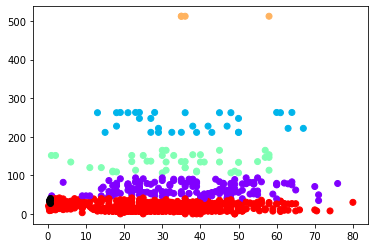

In [115]:
plt.scatter(modeldf['age'],modeldf['fare'], c=modeldf['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [ ]:
##Models were similar, GaussianNB did slightly better than BernoulliNB. 